In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")
meal = pd.read_csv("meal_info.csv")
center = pd.read_csv("fulfilment_center_info.csv")

In [5]:
df = pd.merge(train, meal, on=['meal_id', 'meal_id'])
df2 = pd.merge(df, center, on=['center_id', 'center_id'])
df2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [6]:
df2.to_csv(r'/Users/apple/Desktop/df2.csv', index = False)

In [7]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df2['center_type'] = class_le.fit_transform(df2['center_type'].values)

In [8]:
#table = pd.pivot_table(df2, values=['checkout_price','num_orders'],index=['cuisine'], aggfunc=np.mean)
#table.plot.bar()

In [9]:
#df.plot(x='checkout_price', y='num_orders', style='o')   
#plt.show()

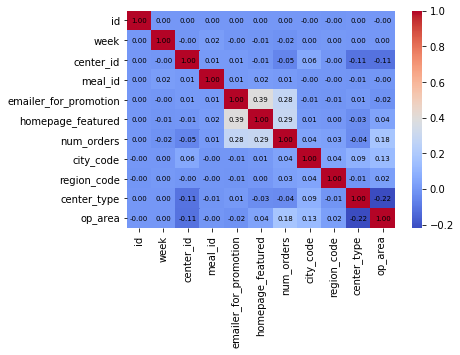

In [10]:
df3 = df2.drop(['checkout_price','base_price'], axis=1)
sns.heatmap(df3.corr(),annot=True,fmt='.2f',cmap= 'coolwarm',annot_kws={'size':7, 'color':'black'})

In [11]:
dummy_fields = ['center_type']

for each in dummy_fields:
    # get_dummies处理数据，参数prefix是指处理之后数据的前缀
    dummies = pd.get_dummies( center.loc[:, each], prefix=each ) 
    center = pd.concat( [center, dummies], axis = 1)
center.head()

,center_id,city_code,region_code,center_type,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,11,679,56,TYPE_A,3.7,1,0,0
1,13,590,56,TYPE_B,6.7,0,1,0
2,124,590,56,TYPE_C,4.0,0,0,1
3,66,648,34,TYPE_A,4.1,1,0,0
4,94,632,34,TYPE_C,3.6,0,0,1


In [12]:
df2 = pd.merge(df, center, on=['center_id', 'center_id'])
df2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,0,0,1


In [13]:
df2['unit_checkoutprice']= df2['checkout_price'] / df2['num_orders']
df2['unit_baseprice'] = df2['base_price'] / df2['num_orders']
df2['price_pro'] = df2['unit_checkoutprice'] * df2['emailer_for_promotion']
#df2['price_center'] = df2['unit_price'] * df2['center_type']
#df2['price^2'] = df2['unit_price'] * df2['unit_price']
df2['price_feat'] = df2['unit_checkoutprice'] * df2['homepage_featured']
df2['log(order)'] = df2['num_orders'].apply(np.log)
df2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,...,center_type,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,unit_checkoutprice,unit_baseprice,price_pro,price_feat,log(order)
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,...,TYPE_C,2.0,0,0,1,0.773051,0.860395,0.0,0.0,5.176150
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,...,TYPE_C,2.0,0,0,1,0.420526,0.471486,0.0,0.0,5.777652
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,...,TYPE_C,2.0,0,0,1,1.384583,1.395000,0.0,0.0,4.564348
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,...,TYPE_C,2.0,0,0,1,0.833497,0.827362,0.0,0.0,5.093750
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,...,TYPE_C,2.0,0,0,1,0.681395,0.686047,0.0,0.0,5.370638


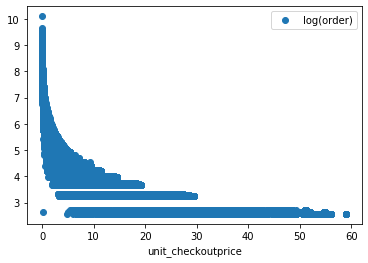

In [14]:
df2.plot(x='unit_checkoutprice', y='log(order)', style='o') 
plt.show()

In [15]:
#food = ['1885','2707','2631','1230','2826,'1109','2569','2956','1962']
#for i in food:
meal = df2[df2['meal_id'].isin(['1543'])]   

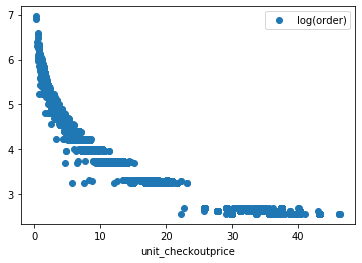

In [16]:
meal.plot(x='unit_checkoutprice', y='log(order)', style='o') 
plt.show()

In [17]:
X1= meal[['unit_checkoutprice','emailer_for_promotion','homepage_featured','op_area','center_type_TYPE_A','center_type_TYPE_B','center_type_TYPE_C']]
y1= meal['log(order)']

In [18]:
import statsmodels.api as sm
X1 = sm.add_constant(X1)
est= sm.OLS(y1,X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(order)   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     9097.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        23:07:35   Log-Likelihood:                -2747.5
No. Observations:               10236   AIC:                             5509.
Df Residuals:                   10229   BIC:                             5560.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.4151      0.012    295.277      0.000       3.392       3.438
unit_checkoutprice       -0.0681      0.000   -205.273      0.000      -0.069      -0.067
emailer_for_promotion     0.2524      0.013     19.491      0.000       0.227       0.278
homepage_featured         0.0524      0.009      5.571      0.000       0.034       0.071
op_area                   0.0647      0.003     19.138      0.000       0.058       0.071
center_type_TYPE_A        1.0713      0.006    192.223      0.000       1.060       1.082
center_type_TYPE_B        1.2456      0.008    151.650      0.000       1.230       1.262
center_type_TYPE_C        1.0981      0.006    194.089      0.000       1.087       1.109
==============================================================================
Omnibus:                      731.775   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.092
Skew:                           0.675   Prob(JB):                    5.30e-199
Kurtosis:                       3.563   Cond. No.                     1.18e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1,y1, test_size= 0.4,random_state = 100)
meal = LinearRegression(fit_intercept=True)
meal.fit(X1_train,y1_train)
y1_pred = meal.predict(X1_test)
mse =mean_squared_error(y1_test, y1_pred)
print(mse)

0.10127333118949995


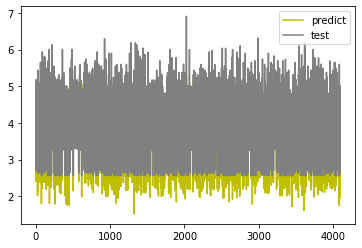

In [21]:
plt.figure()
plt.plot(range(len(y1_pred)),y1_pred,'y',label="predict")
plt.plot(range(len(y1_pred)),y1_test,'grey',label="test")
plt.legend(loc="upper right")
#plt.xlabel("the number of orders")
plt.show()

In [67]:
#cuisine = ['Thai','Italian','Indian','Continental']
cuisine = df2.loc[df2.cuisine.str.contains('Continental')]
category = df2.loc[df2.category.str.contains('Starters')]

In [68]:
import statsmodels.api as sm
X= category[['unit_checkoutprice','emailer_for_promotion','homepage_featured','op_area','center_type_TYPE_A','center_type_TYPE_B','center_type_TYPE_C']]
y= category['log(order)']
X = sm.add_constant(X)
est= sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(order)   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 2.195e+04
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:35:14   Log-Likelihood:                -15111.
No. Observations:               29941   AIC:                         3.024e+04
Df Residuals:                   29934   BIC:                         3.029e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.6612      0.009    426.475      0.000       3.644       3.678
unit_checkoutprice       -0.1390      0.001   -244.357      0.000      -0.140      -0.138
emailer_for_promotion     0.3699      0.012     30.914      0.000       0.346       0.393
homepage_featured         0.2685      0.010     27.942      0.000       0.250       0.287
op_area                   0.0845      0.003     33.500      0.000       0.080       0.089
center_type_TYPE_A        1.1633      0.004    296.386      0.000       1.156       1.171
center_type_TYPE_B        1.5335      0.006    259.769      0.000       1.522       1.545
center_type_TYPE_C        0.9644      0.005    178.960      0.000       0.954       0.975
==============================================================================
Omnibus:                     1578.713   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1837.760
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       3.181   Cond. No.                     2.64e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""